# Ex - Multivariate Time Series Prediction

We can now try to take advantage of all our data, i.e. to deal with the original air quality time series. 

## Loading data

We can still load the data with:

```python
def load_air_data(fname)
```

In [20]:
import lutil

data = lutil.load_air_data()

print(data.describe()) # Shows statistical information about each column
data.head()

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  7674.000000  8991.000000   914.000000  8991.000000    8991.000000   
mean      2.152750  1099.833166   218.811816    10.083105     939.153376   
std       1.453252   217.080037   204.459921     7.449820     266.831429   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.100000   937.000000    67.000000     4.400000     734.500000   
50%       1.800000  1063.000000   150.000000     8.200000     909.000000   
75%       2.900000  1231.000000   297.000000    14.000000    1116.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  7718.000000   8991.000000  7715.000000   8991.000000  8991.000000   
mean    246.896735    835.493605   113.091251   1456.264598  1022.906128   
std     212.979168    256.817320    48.370108    346.206794   398.484288   
min       2

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


As main difference, we will not drop any column.

<!-- Rather wi will add two extra columns containing temporal information. Our goal will still be to predict `CO(GT)`.-->

We will still discard all rows containing missing values (remember: this is not a good idea in general).

In [21]:
import numpy as np

#data = data.drop('NMHC(GT)', axis=1)
data = data.dropna() # Discard tuples with NaN values
#data['doy'] = data.index.dayofyear # Day of the year
#data['hour'] = data.index.hour # Hour of the day
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Let's have a look at the probability distributions:

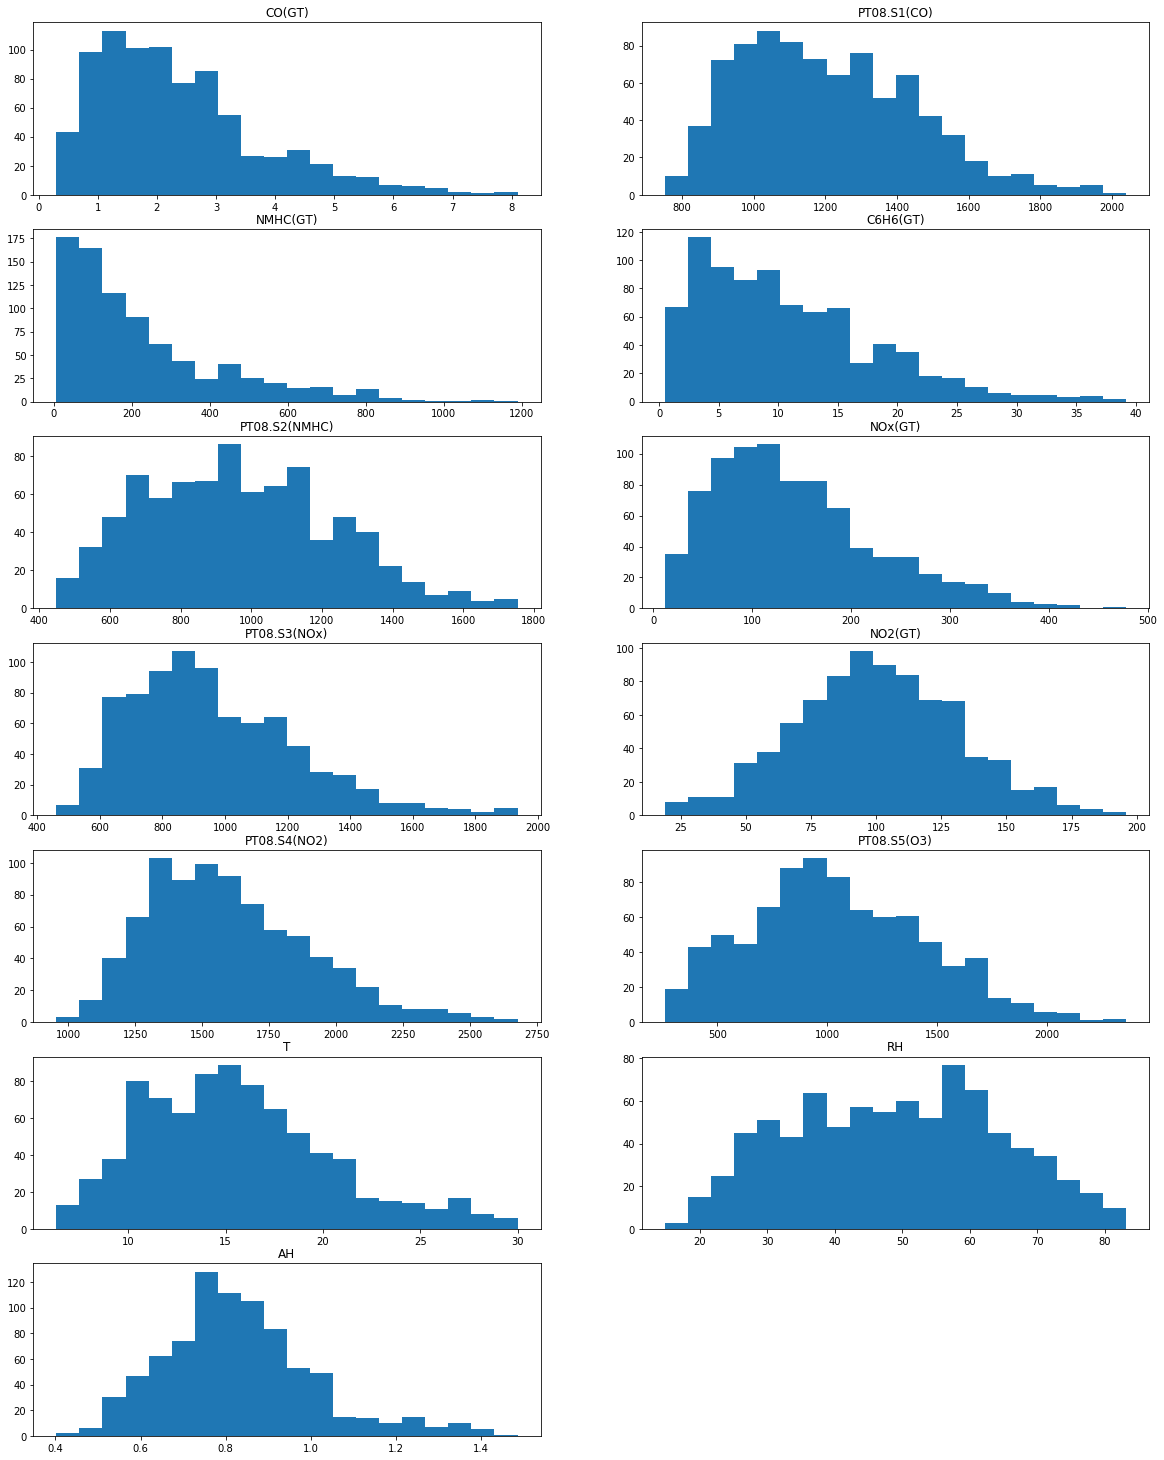

In [22]:
from matplotlib import pyplot as plt

ncols = len(data.columns)
plt.figure(figsize=(20, 26))
for i, col in enumerate(data.columns):
    plt.subplot((ncols) // 2 +1 , 2, i+1)
    plt.title(col)
    plt.hist(data[col], bins=20)
plt.show()

For fairness with the previous comparison, let's use a log scale for the `CO(GT)` columns, plus `NMHC(GT)`, `C6H6(GT)` and `NOx(GT)` (well we should check the type of distribution first, but let's keep it simple for now).

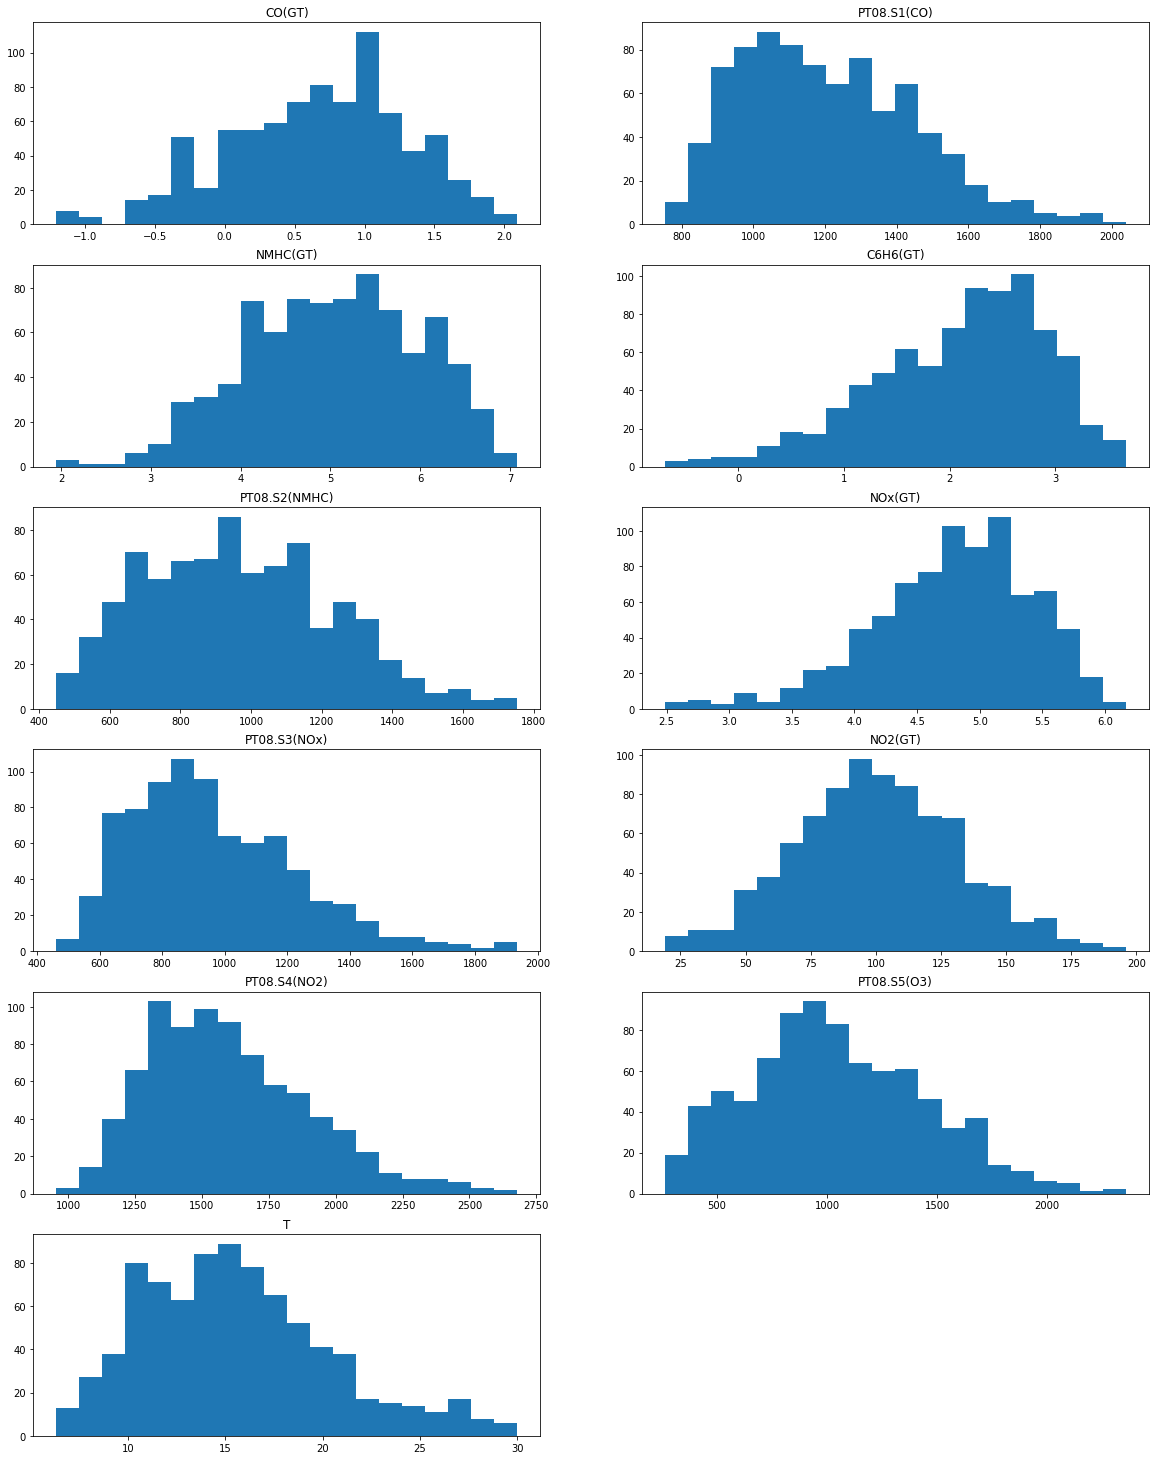

In [23]:
import numpy as np

data['CO(GT)'] = np.log(data['CO(GT)'])
data['NMHC(GT)'] = np.log(data['NMHC(GT)'])
data['C6H6(GT)'] = np.log(data['C6H6(GT)'])
data['NOx(GT)'] = np.log(data['NOx(GT)'])

ncols = len(data.columns)
plt.figure(figsize=(20, 26))
for i, col in enumerate(data.columns[:-2]):
    plt.subplot((ncols-2) // 2 +1 , 2, i+1)
    plt.title(col)
    plt.hist(data[col], bins=20)
plt.show()

We could do better, but let's move on.

## Normalization/Standardization

We will standardize the data as in the previous case.

In [24]:
# Choose a separator date for the training and test set
# NOTE: it's important to compute the means and standard deviations only on the training data!
sep = data.index[-500]

# Standardize the data
means = data[data.index < sep].mean(axis=0)
stds = data[data.index < sep].std(axis=0)
data = (data - means) / stds

data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-03-10 18:00:00,0.431301,0.507009,0.224517,0.485218,0.328920,0.440640,0.137083,0.271273,0.367643,0.512432,-0.079349,-0.080822,-0.029487
2004-03-10 19:00:00,-0.006253,0.231950,-0.098671,0.184869,-0.021842,-0.309972,0.597878,-0.391420,-0.089647,-0.241071,-0.142635,-0.162518,-0.309465
2004-03-10 20:00:00,0.152699,0.676898,-0.365467,0.129487,-0.083515,0.068226,0.465107,0.302829,-0.103400,0.018582,-0.437969,0.266387,-0.095364
2004-03-10 21:00:00,0.152699,0.571728,-0.470907,0.157479,-0.048824,0.496483,0.277664,0.555284,-0.003691,0.346967,-0.627826,0.674868,0.221019
2004-03-10 22:00:00,-0.378396,0.151050,-0.968960,-0.284968,-0.480531,0.068226,0.718934,0.365943,-0.326888,0.110224,-0.585636,0.647636,0.239222


## Building the Training and Test Set

Same approach to split the training and test set.

In [25]:
targets = ['CO(GT)']
nsteps_in = 24

index, x_all, y_all = lutil.sliding_win_ds(data, targets, nsteps_in)

print(index[:2])
print(x_all.shape)
print(y_all.shape)

DatetimeIndex(['2004-03-11 20:00:00', '2004-03-11 21:00:00'], dtype='datetime64[ns]', name='Date', freq=None)
(803, 24, 13)
(803, 1, 1)


/Users/lompa/Documents/Teaching/BBS 2019 - Master in Digital Technology Management/lab01/lutil.py:190: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x = np.stack( (data[i:1+i-totwidth or None:stepsize] for i in range(0, nsteps_in)), axis=1)
/Users/lompa/Documents/Teaching/BBS 2019 - Master in Digital Technology Management/lab01/lutil.py:191: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  y = np.stack( (data[i:1+i-totwidth or None:stepsize][targets] for i in range(nsteps_in, nsteps_in+nsteps_out)), axis=1)


We will reshape the data again, because scikit-learn expects both the training and test data to be bi-dimensional. The downside is that we will need to manullay track the position of different time steps and value types.

In [26]:
x_all = x_all.reshape(len(x_all), -1)
y_all = y_all.reshape(len(y_all), -1)

print(x_all.shape)
print(y_all.shape)

(803, 312)
(803, 1)


We can now separate out training and test set (we use or separator from before):

In [27]:
# Separate training and test set
train_mask = index < sep
x_train, y_train = x_all[train_mask], y_all[train_mask]
index_train = index[train_mask]
test_mask = index >= sep
x_test, y_test = x_all[test_mask], y_all[test_mask]
index_test = index[test_mask]

## Building the model

We can now define the model, train it, and perform the evaluation. We will use the same model as before, except that now we have an input "feature" for each value type and time step:
$$
f(x) = \sum_{i=1}^{n} w_i x_i
$$

We start by creating a `LinearRegression` model in scikit-learn:

In [28]:
from sklearn import linear_model

# Model 1: simple linear regressor
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We can measure the performance as before:

In [29]:
from sklearn import metrics

pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

mae_train = metrics.mean_absolute_error(y_train, pred_train)
r2_train = metrics.r2_score(y_train, pred_train)

mae_test = metrics.mean_absolute_error(y_test, pred_test)
r2_test = metrics.r2_score(y_test, pred_test)

print('std, training set (model): %f' % (y_train.std()))
print('std, test set (model): %f' % (y_test.std()))
print('MAE, training set (model): %f' % (mae_train))
print('MAE, test set (model): %f' % (mae_test))
print('R2, training set (model): %f' % (r2_train))
print('R2, test set (model): %f' % (r2_test))

std, training set (model): 1.005142
std, test set (model): 1.103224
MAE, training set (model): 0.000000
MAE, test set (model): 4.296596
R2, training set (model): 1.000000
R2, test set (model): -23.094406


...And something has changed, *radically*.

We have more information and yet we are doing worse: whati is happening?

The technical term for this kind of situation is "we are overfitting like hell" ;-)

We can try to deal with this situation by encouraging the model to use a small number of features. Technically, we can do it by adding an L1 regularlization.

In [30]:
# Model 1: simple linear regressor
model2 = linear_model.Lasso(alpha=0.05)
model2.fit(x_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

And now we can repeat the evaluation:

In [32]:
pred_train2 = model2.predict(x_train)
pred_test2 = model2.predict(x_test)

mae_train2 = metrics.mean_absolute_error(y_train, pred_train2)
r2_train2 = metrics.r2_score(y_train, pred_train2)

mae_test2 = metrics.mean_absolute_error(y_test, pred_test2)
r2_test2 = metrics.r2_score(y_test, pred_test2)

print('std, training set (model): %f' % (y_train.std()))
print('std, test set (model): %f' % (y_test.std()))
print('MAE, training set (model): %f' % (mae_train2))
print('MAE, test set (model): %f' % (mae_test2))
print('R2, training set (model): %f' % (r2_train2))
print('R2, test set (model): %f' % (r2_test2))

std, training set (model): 1.005142
std, test set (model): 1.103224
MAE, training set (model): 0.352791
MAE, test set (model): 0.406312
R2, training set (model): 0.785030
R2, test set (model): 0.778908


This is way better (although not as good as with a single features) -- there is a catch, of course (and we will mention that later).

We can try and search for the best $\alpha$ values.

Rember that this kind of meta-learning (or hyper-parameter tuning) should always be done via a separate validation set, or alternatively by using cross-validation. We will use the latter:

In [34]:
from sklearn.model_selection import cross_val_score

bestalpha, bestscore = None, None
for alpha in np.linspace(0.01, 0.3, 20):
    model2 = linear_model.Lasso(alpha=alpha)
    scores = cross_val_score(model2, x_train, y_train, cv=10)
    score = scores.mean()
    if bestalpha is None or bestscore < score:
        bestalpha = alpha
        bestscore = score
print('Best alpha: %f' % bestalpha)

Best alpha: 0.040526


In [35]:
model2 = linear_model.Lasso(alpha=bestalpha)
model2.fit(x_train, y_train)

pred_train2 = model2.predict(x_train)
pred_test2 = model2.predict(x_test)

mae_train2 = metrics.mean_absolute_error(y_train, pred_train2)
r2_train2 = metrics.r2_score(y_train, pred_train2)

mae_test2 = metrics.mean_absolute_error(y_test, pred_test2)
r2_test2 = metrics.r2_score(y_test, pred_test2)

print('std, training set (model): %f' % (y_train.std()))
print('std, test set (model): %f' % (y_test.std()))
print('MAE, training set (model): %f' % (mae_train2))
print('MAE, test set (model): %f' % (mae_test2))
print('R2, training set (model): %f' % (r2_train2))
print('R2, test set (model): %f' % (r2_test2))

std, training set (model): 1.005142
std, test set (model): 1.103224
MAE, training set (model): 0.345584
MAE, test set (model): 0.404594
R2, training set (model): 0.793455
R2, test set (model): 0.780411


We could try to improve the results by enforcing a bit of smoothing, via an ElasticNet:

In [36]:
model3 = linear_model.ElasticNet(alpha=0.05, l1_ratio=0.9)
model3.fit(x_train, y_train)

pred_train3 = model3.predict(x_train)
pred_test3 = model3.predict(x_test)

mae_train3 = metrics.mean_absolute_error(y_train, pred_train3)
r2_train3 = metrics.r2_score(y_train, pred_train3)

mae_test3 = metrics.mean_absolute_error(y_test, pred_test3)
r2_test3 = metrics.r2_score(y_test, pred_test3)

print('std, training set (model): %f' % (y_train.std()))
print('std, test set (model): %f' % (y_test.std()))
print('MAE, training set (model): %f' % (mae_train3))
print('MAE, test set (model): %f' % (mae_test3))
print('R2, training set (model): %f' % (r2_train3))
print('R2, test set (model): %f' % (r2_test3))

std, training set (model): 1.005142
std, test set (model): 1.103224
MAE, training set (model): 0.349298
MAE, test set (model): 0.406179
R2, training set (model): 0.789102
R2, test set (model): 0.778860


Now we need to optimize two distinct values:

In [39]:
from sklearn.model_selection import cross_val_score

bestalpha, bestratio, bestscore = None, None, None
for alpha in np.linspace(0.05, 0.3, 20):
    for ratio in np.linspace(0.05, 1, 20):
        model3 = linear_model.ElasticNet(alpha=alpha, l1_ratio=ratio)
        #model3.fit(x_train, y_train)
        #pred_test3 = model3.predict(x_test)
        #score = metrics.r2_score(y_test, pred_test3)
        scores = cross_val_score(model3, x_train, y_train, cv=10)
        score = scores.mean()
        if bestalpha is None or bestscore < score:
            bestalpha = alpha
            bestratio = ratio
            bestscore = score
print('Best alpha: %f' % bestalpha)
print('Best l1_ratio: %f' % bestratio)

Best alpha: 0.050000
Best l1_ratio: 0.900000


And here are the corresponding results:

In [40]:
model3 = linear_model.ElasticNet(alpha=bestalpha, l1_ratio=bestratio)
model3.fit(x_train, y_train)

pred_train3 = model3.predict(x_train)
pred_test3 = model3.predict(x_test)

mae_train3 = metrics.mean_absolute_error(y_train, pred_train3)
r2_train3 = metrics.r2_score(y_train, pred_train3)

mae_test3 = metrics.mean_absolute_error(y_test, pred_test3)
r2_test3 = metrics.r2_score(y_test, pred_test3)

print('std, training set (model): %f' % (y_train.std()))
print('std, test set (model): %f' % (y_test.std()))
print('MAE, training set (model): %f' % (mae_train3))
print('MAE, test set (model): %f' % (mae_test3))
print('R2, training set (model): %f' % (r2_train3))
print('R2, test set (model): %f' % (r2_test3))

std, training set (model): 1.005142
std, test set (model): 1.103224
MAE, training set (model): 0.349298
MAE, test set (model): 0.406179
R2, training set (model): 0.789102
R2, test set (model): 0.778860


Not a big improvement

An interesting alternative consists in using the Lasso model to perform feature selection:

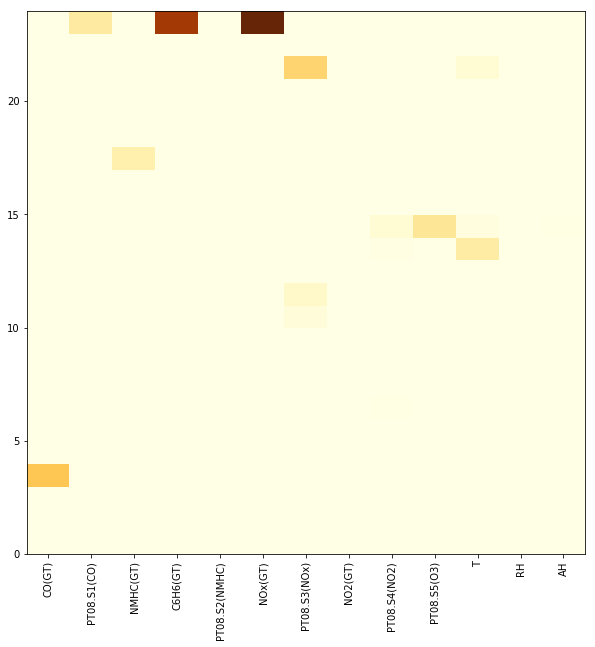

In [41]:
# Obtain the coefficients as a matrix
cmatrix = model2.coef_.reshape((nsteps_in, -1))

plt.figure(figsize=(10, 10))
plt.pcolor(np.abs(cmatrix), cmap='YlOrBr')
plt.xticks(0.5+np.arange(len(data.columns)), data.columns, rotation='vertical')
plt.show()

Let's rank the coefficients by decreasing absolute value:

In [43]:
pairs = [(i, abs(c)) for i, c in enumerate(model2.coef_)]
sorted_pairs = sorted(pairs, key=lambda p: -p[1])
bestidx = [i for i, _ in sorted_pairs[:6]]

In [44]:
x_train2 = x_train[:, bestidx]
x_test2 = x_test[:, bestidx]

model4 = linear_model.LinearRegression()
model4.fit(x_train2, y_train)

pred_train4 = model4.predict(x_train2)
pred_test4 = model4.predict(x_test2)

mae_train4 = metrics.mean_absolute_error(y_train, pred_train4)
r2_train4 = metrics.r2_score(y_train, pred_train4)

mae_test4 = metrics.mean_absolute_error(y_test, pred_test4)
r2_test4 = metrics.r2_score(y_test, pred_test4)

print('std, training set (model): %f' % (y_train.std()))
print('std, test set (model): %f' % (y_test.std()))
print('MAE, training set (model): %f' % (mae_train4))
print('MAE, test set (model): %f' % (mae_test4))
print('R2, training set (model): %f' % (r2_train4))
print('R2, test set (model): %f' % (r2_test4))

std, training set (model): 1.005142
std, test set (model): 1.103224
MAE, training set (model): 0.353113
MAE, test set (model): 0.385470
R2, training set (model): 0.778206
R2, test set (model): 0.801402


And we are doing considerably better.

We may also have a look at how the new features are used:

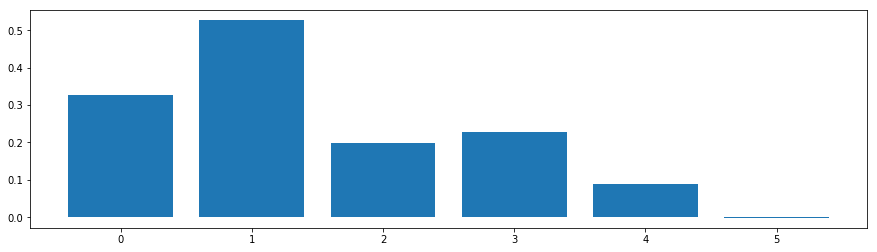

In [46]:
plt.figure(figsize=(15, 4))
plt.bar(range(len(model4.coef_[0])), model4.coef_[0])
plt.show()